
# **Implementing Day trading Strategies using 5 min BTC-USD data**

# **Executive Summary**
**Project Overview**

This project aims to evaluate the performance of technical trading strategies using 5-minute Bitcoin data from October 25, 2022, to December 15, 2023. The Dual Thrust strategy was implemented and tested on the BTCUSD trading pair with varying combinations of parameters to identify the optimal settings.

**Data Summary**

The analysis uses 5-minute BTCUSD trading data extracted from an Excel file. The dataset includes columns such as high, low, open, close, volume, and date. We focus on data between October 25, 2022, and December 15, 2023, to implement and test the Dual Thrust strategy, assuming a starting balance of  2000 dollars and a per-trade investment of $100.

**Strategy Implementation**

**Dual Thrust Strategy**
The Dual Thrust strategy calculates a price range based on historical price data and sets up buy and sell triggers accordingly:

**Range Calculation:**
Range = max(previous high - previous close, previous close - previous low)
Thresholds:
Buy Trigger: Open + k1 * Range
Sell Trigger: Open - k2 * Range


**Parameters Used**

k1 = 0.3, 0.5, 0.7

k2 = 0.3, 0.5, 0.7

window_length = 12, 24, 36

Take Profit: 5%

Stop Loss: -2%


**Trading Simulation Rules**

Start with a balance of 2,000 and invest $100 per trade.
Skip trades if insufficient funds are available.
Calculate portfolio value and BTC holdings over time.




**Performance Analysis**

After testing various parameter combinations, the best result was achieved using:

k1 = 0.3
k2 = 0.3
Window Length = 12


**Results**
Final Portfolio Value: $3,846.42
Number of Long Trades: 3,321


**Conclusion**

The Dual Thrust strategy, when implemented on the BTCUSD pair using 5-minute data from October 25, 2022, to December 15, 2023, demonstrated promising returns with optimal parameter combinations. The combination of k1 = 0.3, k2 = 0.3, and window_length = 12 provided the highest return, resulting in a final portfolio value of $3,846.42.

**DATA preparation**

In [4]:
import pandas as pd
import numpy as np

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:

# Read the CSV file
data = pd.read_csv('/content/drive/My Drive/BTC_ETH.csv',skiprows=range(1, 163), nrows=115199)

# Print the data
print(data)

             low      high      open     close    volume              date  \
0       42955.46  43030.32  43030.32  42955.46  0.835345   12/15/2023 0:00   
1       43019.74  43035.72  43019.74  43024.90  0.114802  12/14/2023 23:55   
2       42988.60  43013.68  42988.60  43013.68  0.870160  12/14/2023 23:50   
3       42956.44  42991.75  42982.04  42979.75  2.168241  12/14/2023 23:45   
4       42962.05  42994.85  42963.97  42994.85  1.204057  12/14/2023 23:40   
...          ...       ...       ...       ...       ...               ...   
115194  19291.07  19298.07  19295.13  19293.69  0.546026   10/25/2022 0:20   
115195  19296.65  19317.71  19317.71  19299.59  1.487230   10/25/2022 0:15   
115196  19315.09  19332.93  19322.85  19317.71  0.799910   10/25/2022 0:10   
115197  19296.52  19323.00  19306.73  19316.79  6.134015   10/25/2022 0:05   
115198  19279.25  19338.35  19332.19  19291.37  4.650611   10/25/2022 0:00   

            pair  
0       BTC-USDT  
1       BTC-USDT  
2     

In [8]:
df = pd.DataFrame(data)

# Convert the 'Date_Time' column to datetime objects
df['Date_Time'] = pd.to_datetime(df['date'])

# Set the 'Date_Time' column as the index
df = df.set_index('Date_Time')

# Sort the index (dates and times)
df = df.sort_index()

# Print the dataframe
print(df)

                          low      high      open     close    volume  \
Date_Time                                                               
2022-10-25 00:00:00  19279.25  19338.35  19332.19  19291.37  4.650611   
2022-10-25 00:05:00  19296.52  19323.00  19306.73  19316.79  6.134015   
2022-10-25 00:10:00  19315.09  19332.93  19322.85  19317.71  0.799910   
2022-10-25 00:15:00  19296.65  19317.71  19317.71  19299.59  1.487230   
2022-10-25 00:20:00  19291.07  19298.07  19295.13  19293.69  0.546026   
...                       ...       ...       ...       ...       ...   
2023-12-14 23:40:00  42962.05  42994.85  42963.97  42994.85  1.204057   
2023-12-14 23:45:00  42956.44  42991.75  42982.04  42979.75  2.168241   
2023-12-14 23:50:00  42988.60  43013.68  42988.60  43013.68  0.870160   
2023-12-14 23:55:00  43019.74  43035.72  43019.74  43024.90  0.114802   
2023-12-15 00:00:00  42955.46  43030.32  43030.32  42955.46  0.835345   

                                 date      pair  


# **Visualising and Analysing the signals**


# **Detailed Explanation of the Dual Thrust Strategy**

**Concept Overview**

The Dual Thrust strategy is a simple yet effective trading strategy that focuses on breakouts in either direction based on historical price ranges. It sets up a "buy line" and a "sell line" calculated using historical data, and it executes trades when the current price crosses these lines.


**Key Components**

**Historical Range Calculation:**

The strategy uses a lookback period, denoted as window_length, to calculate the highest high, lowest low, highest close, and lowest close over that period.

**Highest High (HH): **The highest price reached in the last window_length periods.

**Lowest Low (LL):** The lowest price reached in the last window_length periods.

**Highest Close (HC)**: The highest closing price in the last window_length periods.

**Lowest Close (LC)**: The lowest closing price in the last window_length periods.

**Range Calculation:**
The range is calculated based on the differences between the historical high/close and low/close.

**Range: max(HH - LC, HC - LL)**

**Thresholds (BuyLine and SellLine):**

**BuyLine:** The level above which a buy signal is triggered.

BuyLine = Open + k1 * Range

**SellLine:** The level below which a sell signal is triggered.

SellLine = Open - k2 * Range


**Trade Execution Rules:**

**Buy Signal:** If the current closing price is higher than BuyLine, a long (buy) position is taken.

**Sell Signal:** If the current closing price is lower than SellLine, a short (sell) position is taken.


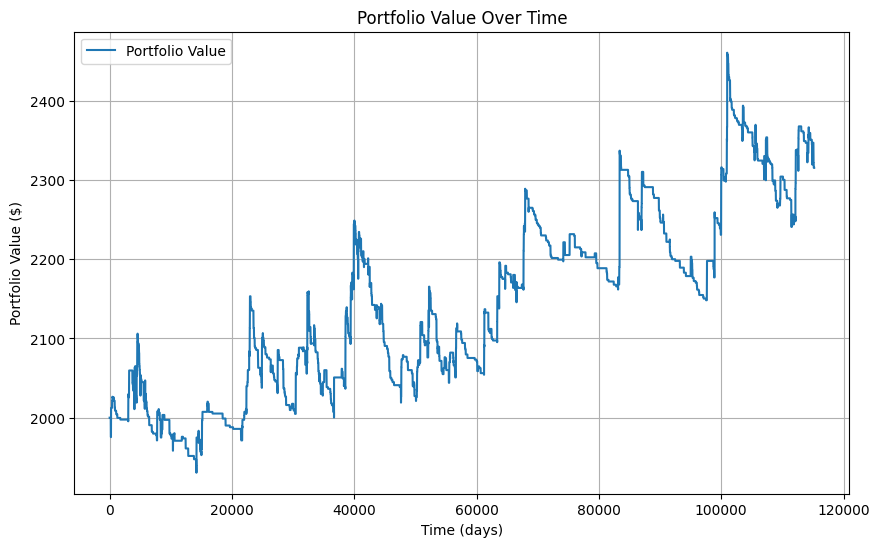

Final portfolio value: $2315.51


In [17]:
# Set parameters
k1 = 0.5
k2 = 0.5
window_length = 12  # since its 5 min data window 12 is 1 hrs
initial_investment = 2000
trade_size = 100
take_profit = 0.05  # 5%
stop_loss = -0.02  # -2%

# Calculate the highest high and lowest low over the given window
HH = df['high'].rolling(window=window_length).max()
LC = df['close'].rolling(window=window_length).min()
HC = df['close'].rolling(window=window_length).max()
LL = df['low'].rolling(window=window_length).min()

# Calculate the range and thresholds
Range = np.maximum(HH - LC, HC - LL)
BuyLine = df['open'] + k1 * Range
SellLine = df['open'] - k2 * Range

# Determine long and short conditions
LongCondition = df['close'] > BuyLine.shift(1)
ShortCondition = df['close'] < SellLine.shift(1)

# Initiate a portfolio
cash = initial_investment
positions = []
portfolio_value = []

for i in range(len(df)):
    # Close positions that meet the take profit or stop loss criteria
    new_positions = []
    for pos in positions:
        if pos['type'] == 'long':
            change = (df['close'].iloc[i] - pos['entry']) / pos['entry']
        else:
            change = (pos['entry'] - df['close'].iloc[i]) / pos['entry']

        if change >= take_profit or change <= stop_loss:
            cash += trade_size * (1 + change)
        else:
            new_positions.append(pos)

    positions = new_positions

    # Open new positions if there is enough cash
    if cash >= trade_size:
        if LongCondition.iloc[i] and cash >= trade_size:
            positions.append({'type': 'long', 'entry': df['close'].iloc[i]})
            cash -= trade_size
        elif ShortCondition.iloc[i] and cash >= trade_size:
            positions.append({'type': 'short', 'entry': df['close'].iloc[i]})
            cash -= trade_size

    # Calculate portfolio value
    portfolio_value.append(cash + len(positions) * trade_size)

# Plotting the portfolio value
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time (days)')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Final portfolio value
final_value = portfolio_value[-1]
print(f"Final portfolio value: ${final_value:.2f}")


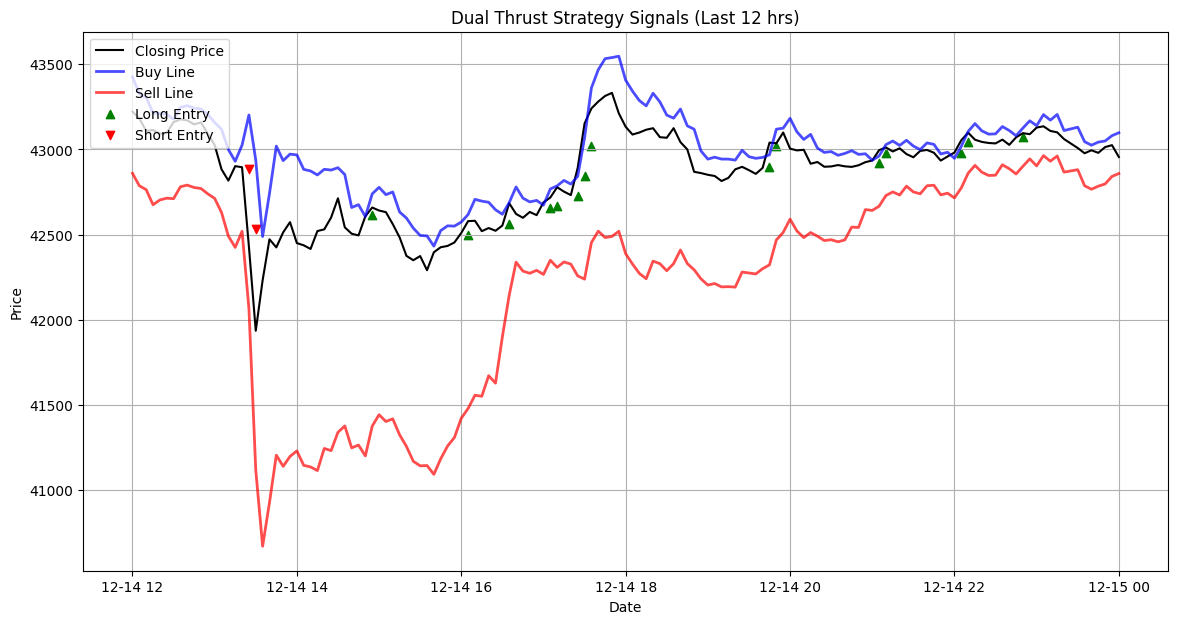

In [14]:
# Plot closing price, Buy Line, and Sell Line
plt.figure(figsize=(14, 7))
plt.plot(df.index[-144:], df['close'][-144:], color='black', label='Closing Price')
plt.plot(df.index[-144:], BuyLine[-144:], color='blue', linewidth=2, alpha=0.7, label='Buy Line')
plt.plot(df.index[-144:], SellLine[-144:], color='red', linewidth=2, alpha=0.7, label='Sell Line')

# Plot entry signals
plt.scatter(df.index[-144:][LongCondition[-144:]], df['low'][-144:][LongCondition[-144:]], color='green', label='Long Entry', marker='^', alpha=1)
plt.scatter(df.index[-144:][ShortCondition[-144:]], df['high'][-144:][ShortCondition[-144:]], color='red', label='Short Entry', marker='v', alpha=1)

plt.title('Dual Thrust Strategy Signals (Last 12 hrs)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

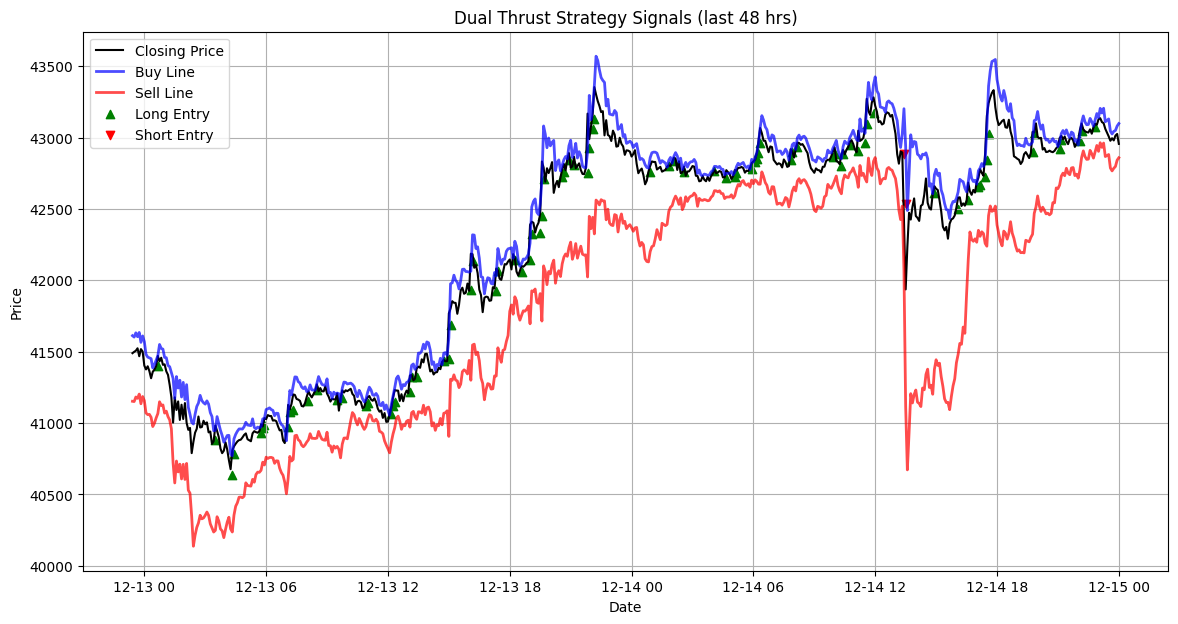

In [15]:
# Plot closing price, Buy Line, and Sell Line
plt.figure(figsize=(14, 7))
plt.plot(df.index[-576:], df['close'][-576:], color='black', label='Closing Price')
plt.plot(df.index[-576:], BuyLine[-576:], color='blue', linewidth=2, alpha=0.7, label='Buy Line')
plt.plot(df.index[-576:], SellLine[-576:], color='red', linewidth=2, alpha=0.7, label='Sell Line')

# Plot entry signals
plt.scatter(df.index[-576:][LongCondition[-576:]], df['low'][-576:][LongCondition[-576:]], color='green', label='Long Entry', marker='^', alpha=1)
plt.scatter(df.index[-576:][ShortCondition[-576:]], df['high'][-576:][ShortCondition[-576:]], color='red', label='Short Entry', marker='v', alpha=1)

plt.title('Dual Thrust Strategy Signals (last 48 hrs)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [18]:
# Define parameter ranges
k1_values = [0.3, 0.5, 0.7]
k2_values = [0.3, 0.5, 0.7]
window_lengths = [12, 24, 36]
initial_investment = 2000
trade_size = 100
take_profit = 0.05  # 5% profit
stop_loss = -0.02  # 2% loss

# Store the results
results = []

# Loop through each combination of k1, k2, and window_length
for k1 in k1_values:
    for k2 in k2_values:
        for window_length in window_lengths:
            # Calculate the highest high and lowest low over the given window
            HH = df['high'].rolling(window=window_length).max()
            LC = df['close'].rolling(window=window_length).min()
            HC = df['close'].rolling(window=window_length).max()
            LL = df['low'].rolling(window=window_length).min()

            # Calculate the range and thresholds
            Range = np.maximum(HH - LC, HC - LL)
            BuyLine = df['open'] + k1 * Range
            SellLine = df['open'] - k2 * Range

            # Determine long and short conditions
            LongCondition = df['close'] > BuyLine.shift(1)
            ShortCondition = df['close'] < SellLine.shift(1)

            # Initialize a portfolio
            cash = initial_investment
            positions = []
            portfolio_value = []

            for i in range(len(df)):
                # Close positions that meet the take profit or stop loss criteria
                new_positions = []
                for pos in positions:
                    if pos['type'] == 'long':
                        change = (df['close'].iloc[i] - pos['entry']) / pos['entry']
                    else:
                        change = (pos['entry'] - df['close'].iloc[i]) / pos['entry']

                    if change >= take_profit or change <= stop_loss:
                        cash += trade_size * (1 + change)
                    else:
                        new_positions.append(pos)

                positions = new_positions

                # Open new positions if there is enough cash
                if cash >= trade_size:
                    if LongCondition.iloc[i] and cash >= trade_size:
                        positions.append({'type': 'long', 'entry': df['close'].iloc[i]})
                        cash -= trade_size
                    elif ShortCondition.iloc[i] and cash >= trade_size:
                        positions.append({'type': 'short', 'entry': df['close'].iloc[i]})
                        cash -= trade_size

                # Calculate portfolio value
                portfolio_value.append(cash + len(positions) * trade_size)

            # Final portfolio value
            final_value = portfolio_value[-1]

            # Store results
            results.append({
                'k1': k1,
                'k2': k2,
                'window_length': window_length,
                'final_value': final_value
            })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

     k1   k2  window_length  final_value
0   0.3  0.3             12  2323.238368
1   0.3  0.3             24  2359.297589
2   0.3  0.3             36  2490.945202
3   0.3  0.5             12  3230.060107
4   0.3  0.5             24  3346.130559
5   0.3  0.5             36  3007.169626
6   0.3  0.7             12  3400.283740
7   0.3  0.7             24  3405.917712
8   0.3  0.7             36  3063.614917
9   0.5  0.3             12  1592.658389
10  0.5  0.3             24  1499.833819
11  0.5  0.3             36  1510.479960
12  0.5  0.5             12  2315.510438
13  0.5  0.5             24  2067.488036
14  0.5  0.5             36  1999.894938
15  0.5  0.7             12  2867.261810
16  0.5  0.7             24  2401.993754
17  0.5  0.7             36  2179.690480
18  0.7  0.3             12  1177.704104
19  0.7  0.3             24  1242.512729
20  0.7  0.3             36  1365.332237
21  0.7  0.5             12  1615.764377
22  0.7  0.5             24  1483.368761
23  0.7  0.5    

**Trying just long trades for results**

In [9]:
# Define the parameter ranges
k_values = [0.3, 0.4, 0.5, 0.6, 0.7]
window_lengths = [12, 24, 36, 48, 60]
initial_investment = 2000
trade_size = 100
take_profit = 0.05  # 5% profit
stop_loss = -0.02  # 2% loss

# Store the results
results = []

# Loop over each combination of k and window_length
for k in k_values:
    for window_length in window_lengths:
        # Calculate the rolling statistics
        HH = df['high'].rolling(window=window_length).max()
        LC = df['close'].rolling(window=window_length).min()
        HC = df['close'].rolling(window=window_length).max()
        LL = df['low'].rolling(window=window_length).min()

        # Calculate the range and thresholds
        dual_range = np.maximum(HH - LC, HC - LL)
        BuyLine = df['open'] + k * dual_range

        # Determine long conditions
        LongCondition = df['close'] > BuyLine.shift(1)

        # Initialize a portfolio
        cash = initial_investment
        positions = []
        number_of_long_trades = 0  # Counter for the number of long trades

        for i in range(len(df)):
            # Close positions that meet the take profit or stop loss criteria
            new_positions = []
            for pos in positions:
                change = (df['close'].iloc[i] - pos['entry']) / pos['entry']
                if change >= take_profit or change <= stop_loss:
                    cash += trade_size * (1 + change)
                else:
                    new_positions.append(pos)

            positions = new_positions

            # Open new long positions if there is enough cash and condition is met
            if LongCondition.iloc[i] and cash >= trade_size:
                positions.append({'type': 'long', 'entry': df['close'].iloc[i]})
                cash -= trade_size
                number_of_long_trades += 1  # Increment the long trade counter

        # Final portfolio value
        final_value = cash + len(positions) * trade_size

        # Store results
        results.append({
            'k_value': k,
            'window_length': window_length,
            'final_value': final_value,
            'number_of_long_trades': number_of_long_trades
        })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

    k_value  window_length  final_value  number_of_long_trades
0       0.3             12  3846.420634                   3321
1       0.3             24  3518.035054                   2631
2       0.3             36  3130.518223                   2148
3       0.3             48  2770.592285                   1792
4       0.3             60  2751.626389                   1567
5       0.4             12  3716.767583                   2876
6       0.4             24  3115.348600                   2002
7       0.4             36  2647.349920                   1512
8       0.4             48  2567.854682                   1183
9       0.4             60  2277.292122                    921
10      0.5             12  3497.704202                   2399
11      0.5             24  2582.530120                   1459
12      0.5             36  2302.110066                    988
13      0.5             48  2299.606226                    697
14      0.5             60  2203.828980                

**Plotting the best results from the two table**

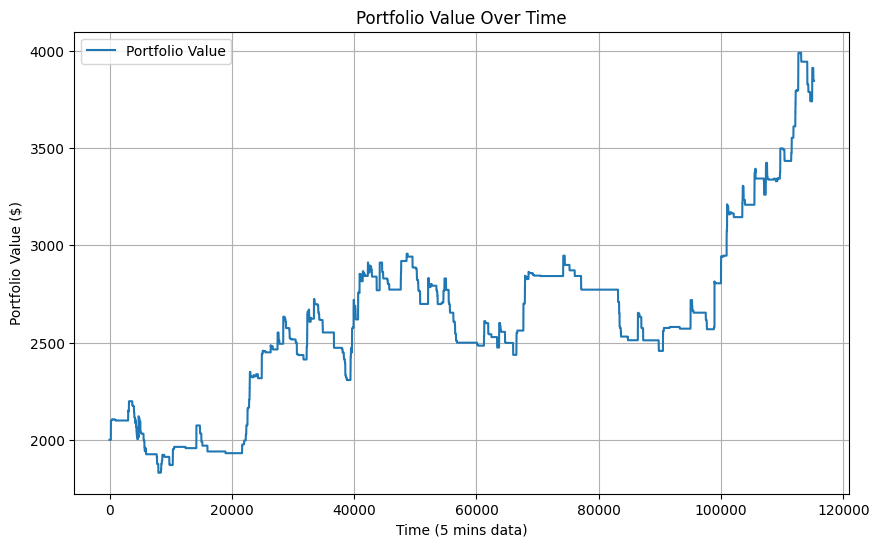

Final portfolio value: $3846.42


In [13]:
import matplotlib.pyplot as plt
# Set parameters
k1 = 0.3
window_length = 12
initial_investment = 2000
trade_size = 100
take_profit = 0.05 # 5%
stop_loss = -0.02  # -1%

# Calculate the highest high and lowest low over the given window
HH = df['high'].rolling(window=window_length).max()
LC = df['close'].rolling(window=window_length).min()
HC = df['close'].rolling(window=window_length).max()
LL = df['low'].rolling(window=window_length).min()

# Calculate the range and thresholds
Range = np.maximum(HH - LC, HC - LL)
BuyLine = df['open'] + k1 * Range

# Determine long conditions
LongCondition = df['close'] > BuyLine.shift(1)

# Initiate a portfolio
cash = initial_investment
positions = []
portfolio_value = []

for i in range(len(df)):
    # Close positions that meet the take profit or stop loss criteria
    new_positions = []
    for pos in positions:
        change = (df['close'].iloc[i] - pos['entry']) / pos['entry']

        if change >= take_profit or change <= stop_loss:
            cash += trade_size * (1 + change)
        else:
            new_positions.append(pos)

    positions = new_positions

    # Open new long positions if there is enough cash and condition is met
    if LongCondition.iloc[i] and cash >= trade_size:
        positions.append({'type': 'long', 'entry': df['close'].iloc[i]})
        cash -= trade_size

    # Calculate portfolio value
    portfolio_value.append(cash + len(positions) * trade_size)

# Plotting the portfolio value
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time (5 mins data)')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Final portfolio value
final_value = portfolio_value[-1]
print(f"Final portfolio value: ${final_value:.2f}")
